# CC3001 2023-1 - Tarea 6: Quicksort

Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la primera, el método de partición debe elegir el pivote como el primer elemento del sub arreglo que está particionando. En la segunda, el pivote debe elegirse como la mediana entre el primero, el del medio y el último elemento. Usted debe entregar un link a su tarea en `colab`.

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
contador1 = 0
contador2 = 0
def quicksort(a):
    qsort(a,0,len(a)-1)

def qsort(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k=particion(a,i,j)
        qsort(a,i,k-1)
        qsort(a,k+1,j)

def particion(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
    global contador2
    # a[i] es el pivote
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    for t in range(s,j):
        if a[t+1]<=a[i]:
            (a[s+1],a[t+1])=(a[t+1],a[s+1])
            s=s+1
            contador2 += 1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)

[0.7054579  0.49768037 0.56734808 0.73166673 0.91124525 0.38139492
 0.14778854 0.65554602 0.41485171 0.02715527 0.03108239 0.46874831
 0.35790223 0.92708733 0.93235802 0.31762802 0.52253835 0.89698289
 0.04742255 0.99062245 0.86657838 0.15822718 0.00264081 0.74193398
 0.99268897 0.75791901 0.47672907 0.38814078 0.31529727 0.1119624 ]
Desordenado
[0.00264081 0.02715527 0.03108239 0.04742255 0.1119624  0.14778854
 0.15822718 0.31529727 0.31762802 0.35790223 0.38139492 0.38814078
 0.41485171 0.46874831 0.47672907 0.49768037 0.52253835 0.56734808
 0.65554602 0.7054579  0.73166673 0.74193398 0.75791901 0.86657838
 0.89698289 0.91124525 0.92708733 0.93235802 0.99062245 0.99268897]
Ordenado


# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
def quicksort3(a):
    qsort3(a,0,len(a)-1)

#Esta es la versión del apunte que deberá modificar
def qsort3(a,i,j): # ordena a[i],...,a[j]
  if j - i > 0:
    if j - i == 1:  # Caso borde para dos elementos
        if a[i] > a[j]:
            a[i], a[j] = a[j], a[i]
    else:
        k=particionMedianaDe3(a,i,j)
        qsort3(a,i,k-1)
        qsort3(a,k+1,j)
  else:
      return

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
  global contador1
  # Definimos el dato de la mitad del arreglo y almacenamos los valores de a[i] y a[j]

  mitad = (i+j) // 2

  # Tomamos como elemento del inicio i y como elemento del final j
  # Ahora tenemos que saber cual es el mayor y cual es el menor

  if a[i] > a[mitad]:
      a[i], a[mitad] = a[mitad], a[i]
  if a[i] > a[j]:
      a[i], a[j] = a[j], a[i]
  if a[mitad] > a[j]:
      a[mitad], a[j] = a[j], a[mitad]

  # Ahora intercambiamos la mediana con el elemento a[i+1]
  (a[i+1],a[mitad]) = (a[mitad],a[i+1])


  s = i + 1  # Inicia s dos posiciones después del pivote
  for t in range(s, j-1):
      if a[t+1] <= a[i+1]:
          a[s+1], a[t+1] = a[t+1], a[s+1]
          s += 1
          contador1 += 1
  # Mover pivote al centro
  a[i+1], a[s] = a[s], a[i+1]
  return s

In [ ]:
import numpy as np
a = np.random.random(50)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)

[0.30147849 0.52814719 0.75142407 0.78192617 0.02763024 0.46489701
 0.19725433 0.33783909 0.22936373 0.17377939 0.12545837 0.39827982
 0.71472367 0.72281304 0.98375273 0.60350183 0.11877174 0.74902382
 0.34982319 0.72526564 0.59845442 0.63112044 0.42713958 0.49458611
 0.08193944 0.09120885 0.77920236 0.40922427 0.18259465 0.34128956
 0.65869863 0.76598665 0.52546769 0.69228437 0.97584775 0.86624563
 0.61320827 0.44487362 0.04274935 0.56129072 0.11650704 0.89530373
 0.11903521 0.83570742 0.05824703 0.41509036 0.89310639 0.60471343
 0.05479266 0.15447671]
Desordenado
[0.02763024 0.04274935 0.05479266 0.05824703 0.08193944 0.09120885
 0.11650704 0.11877174 0.11903521 0.12545837 0.15447671 0.17377939
 0.18259465 0.19725433 0.22936373 0.30147849 0.33783909 0.34128956
 0.34982319 0.39827982 0.40922427 0.41509036 0.42713958 0.44487362
 0.46489701 0.49458611 0.52546769 0.52814719 0.56129072 0.59845442
 0.60350183 0.60471343 0.61320827 0.63112044 0.65869863 0.69228437
 0.71472367 0.72281304 0.7

Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

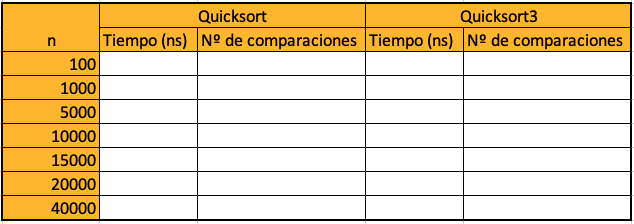


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
import time
a = np.random.random(100)
t1 = time.clock_gettime_ns(0)
quicksort(a)
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")

el tiempo que demoró el proceso fue de  539579 nanosegundos


Para contar las comparaciones puede usar variables globales que se incrementan convenientemente. Solo cuente las comparaciones que se hacen en el proceso de partición (dentro del `for`). Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

In [ ]:
import numpy as np
import time
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]
for x in ns:
  a = np.random.random(x)
  b = a.copy()
  contador1 = 0
  contador2 = 0
  print("Quicksort3 con n =",x)
  t1 = time.clock_gettime_ns(0)
  quicksort3(a)
  t2 = time.clock_gettime_ns(0)
  print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")
  print("el numero de comparaciones es ", contador1)
  print("")
  print("")
  print("Quicksort con n =",x)
  t3 = time.clock_gettime_ns(0)
  quicksort(b)
  t4 = time.clock_gettime_ns(0)
  print("el tiempo que demoró el proceso fue de ",(t4-t3),"nanosegundos")
  print("el numero de comparaciones es ", contador2)
  print("---------------------------------------------------------------------")


Quicksort3 con n = 100
el tiempo que demoró el proceso fue de  438919 nanosegundos
el numero de comparaciones es  296


Quicksort con n = 100
el tiempo que demoró el proceso fue de  376000 nanosegundos
el numero de comparaciones es  292
---------------------------------------------------------------------
Quicksort3 con n = 1000
el tiempo que demoró el proceso fue de  4670317 nanosegundos
el numero de comparaciones es  3759


Quicksort con n = 1000
el tiempo que demoró el proceso fue de  12137932 nanosegundos
el numero de comparaciones es  4865
---------------------------------------------------------------------
Quicksort3 con n = 5000
el tiempo que demoró el proceso fue de  25421605 nanosegundos
el numero de comparaciones es  25509


Quicksort con n = 5000
el tiempo que demoró el proceso fue de  25056107 nanosegundos
el numero de comparaciones es  33055
---------------------------------------------------------------------
Quicksort3 con n = 10000
el tiempo que demoró el proceso fue d

# Tabla
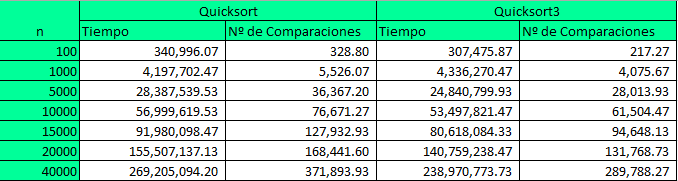

# Gráficos
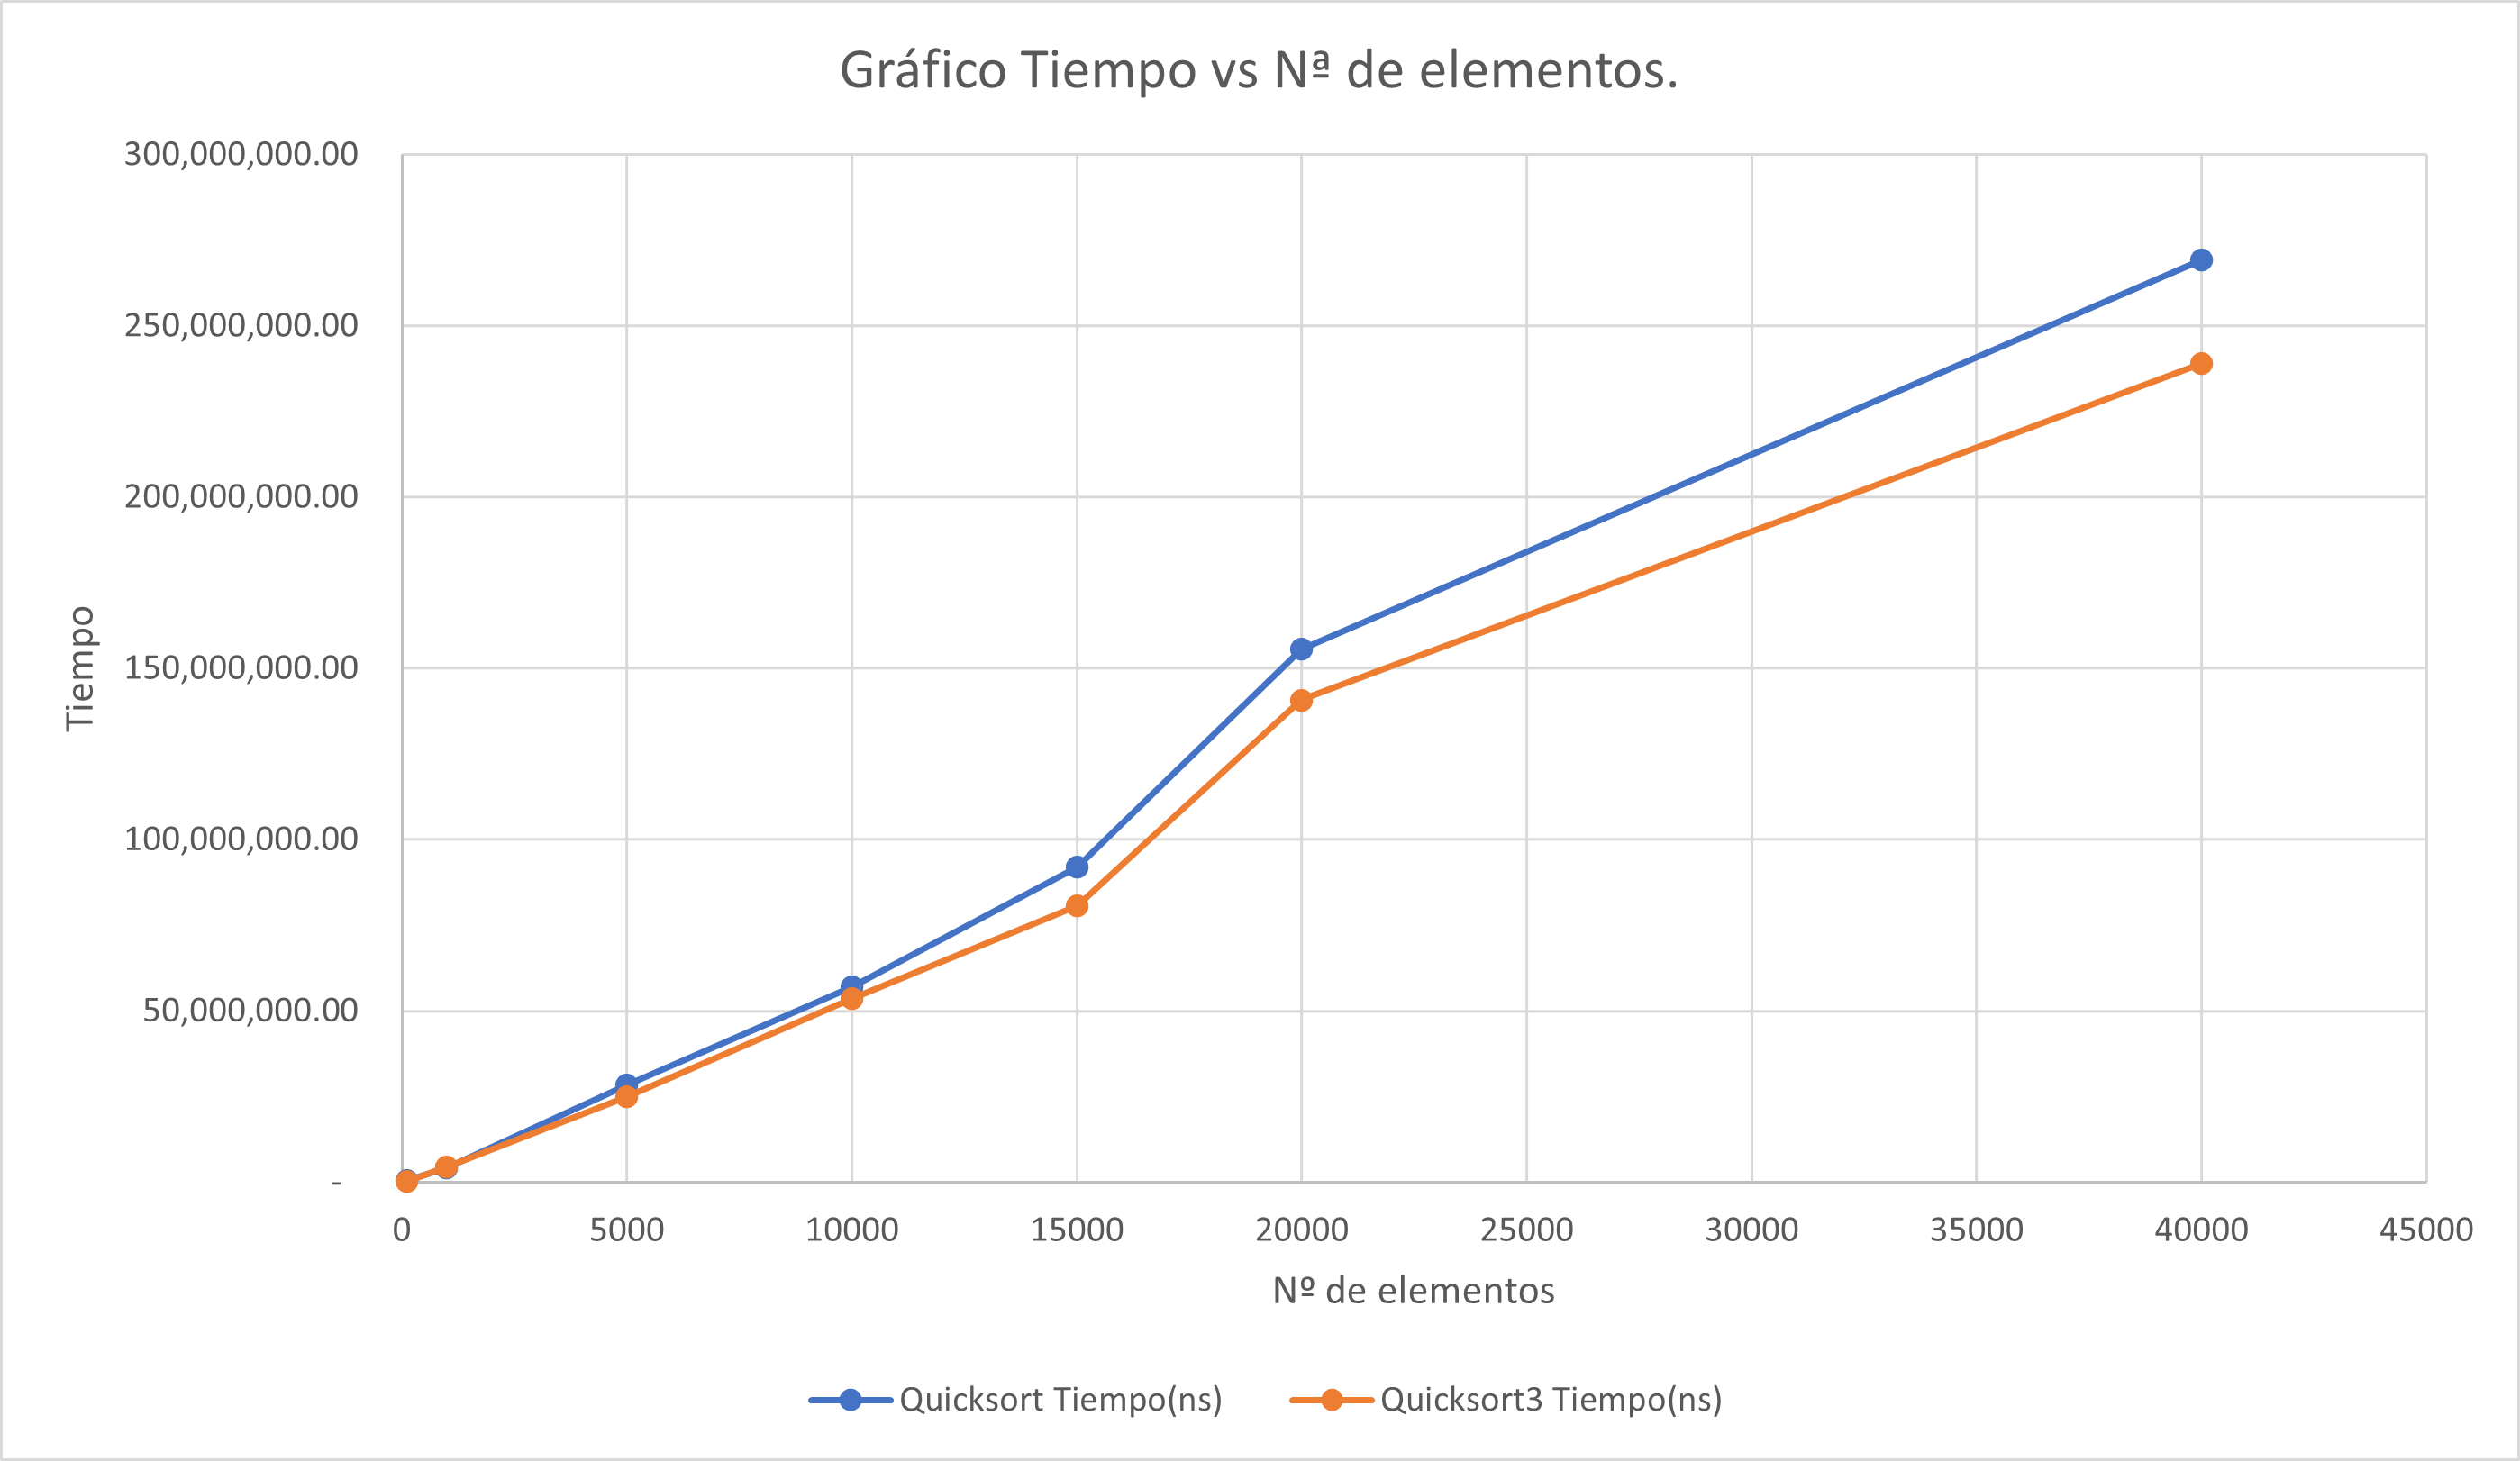

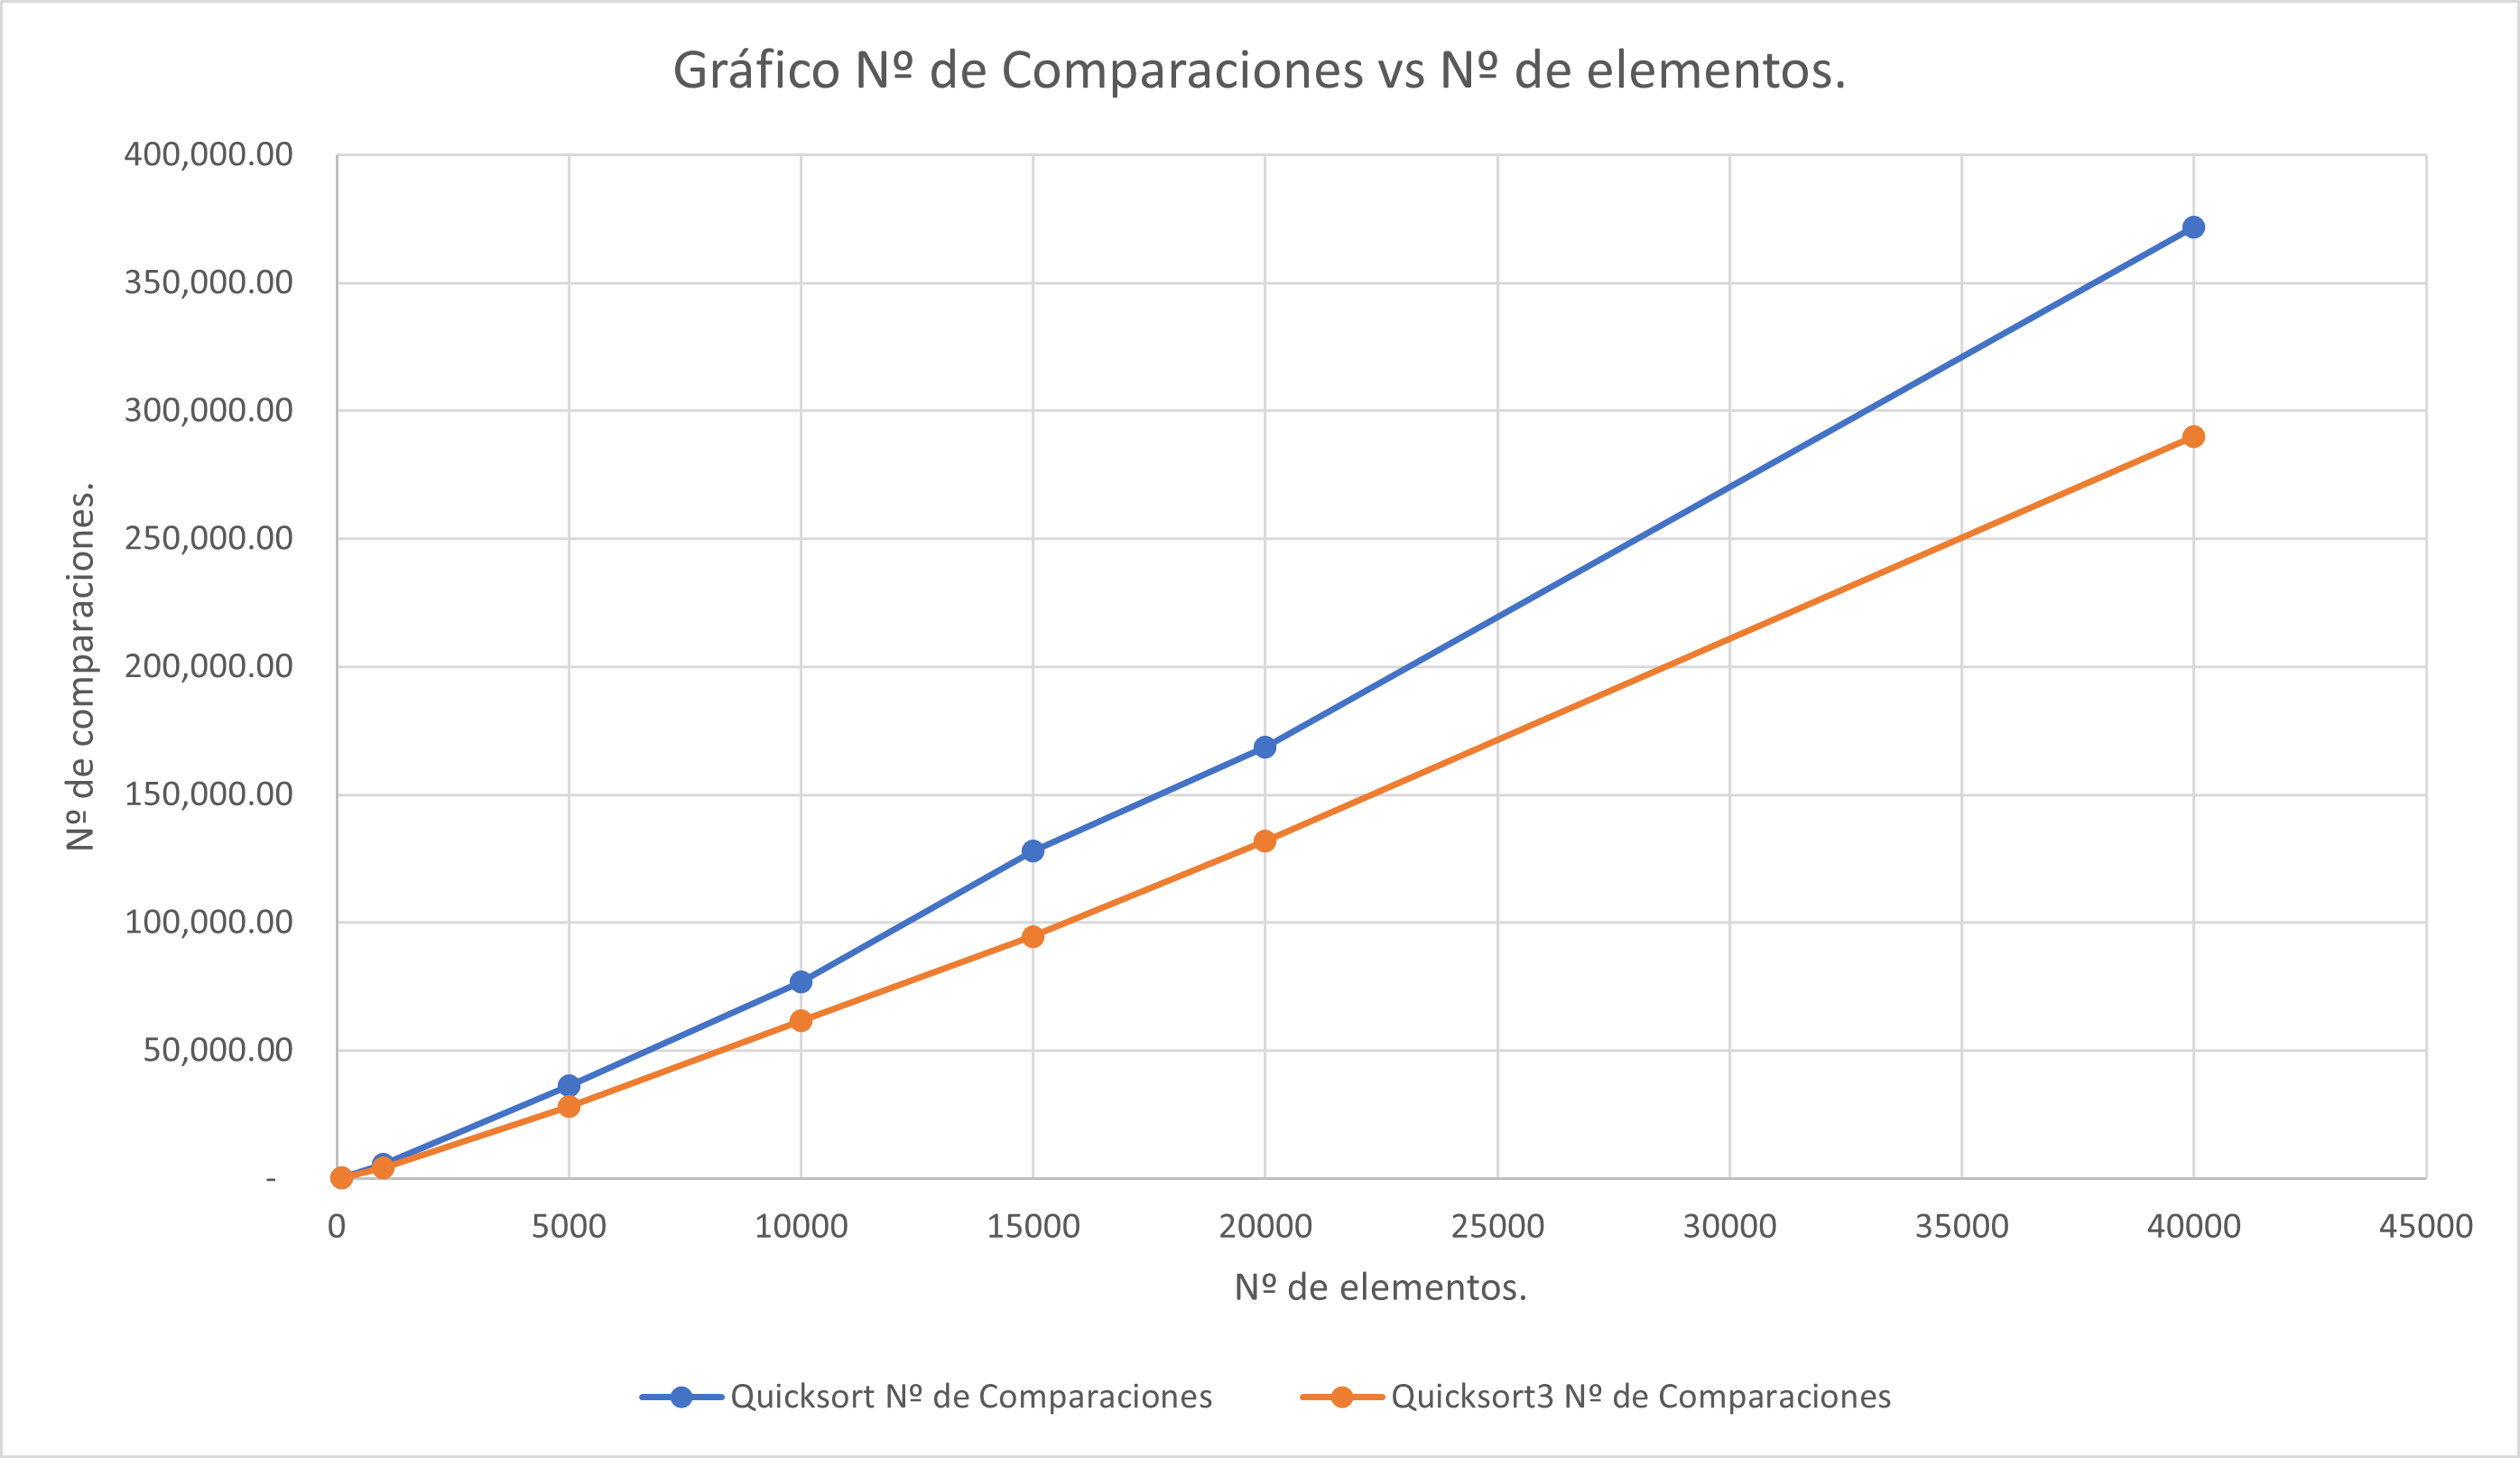

In [ ]:
import numpy as np
import time
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]
for x in range(0,15):
  a = np.random.random(40000)
  b = a.copy()
  contador1 = 0
  contador2 = 0
  t1 = time.clock_gettime_ns(0)
  quicksort(a)
  t2 = time.clock_gettime_ns(0)
  t3 = time.clock_gettime_ns(0)
  quicksort3(b)
  t4 = time.clock_gettime_ns(0)
  print((t2-t1), contador2, (t4-t3), contador1)





325230942 397738 245838483 310302
264992993 342404 233026094 275726
246298883 327087 241764634 302751
263744583 356456 246284784 289657
283905672 421299 235919794 280607
269297343 388036 236912883 280712
252819004 361879 228555304 273812
272266152 381021 236560933 302726
250088524 364086 236710593 291553
263804534 363794 239446244 275266
255629023 349826 251014634 313489
274702722 400041 245760904 308481
263144753 351750 236543144 273169
279178462 407494 242257744 291965
272972823 365498 227965434 276608
